In [19]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import sys
import os
import gseapy as gp
import pdb
import copy
from scipy import sparse
import anndata
import cerberus
import scipy

p = os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd())))
sys.path.append(p)

from scripts.utils import *
from scripts.plotting import *

In [20]:
h5 = '../cerberus_annot.h5'
h5_annot = 'cerberus_annot_triplets.h5'
ab = '../../talon/human_talon_abundance.tsv'
filt_ab = '../cerberus_filtered_abundance.tsv'
obs_col = 'sample'
min_tpm = 1
major_set = '../swan/isos_sample_gene_90.tsv'
mm_tissues = ['adrenal gland', 'heart',
              'muscle', 'brain', 'pgp1_excite_neuron',
              'pgp1_astro', 'h9_osteocyte',
              'h1', 'wtc11']

fig_dir = '/Users/fairliereese/mortazavi_lab/documents/rnawg/fig1/'


In [21]:
ca = cerberus.read(h5_annot)

In [22]:
c_dict, order = get_biosample_colors()
c_dict[np.nan] = 'k'

mm_tissues = ['adrenal gland', 'heart',
              'muscle', 'brain', 'pgp1_excite_neuron',
              'pgp1_astro', 'h9_osteocyte']
mmap = {'v40': '*', 'v29': 'x', 'obs_det': '^', 'cerberus': '2'}
subset = {'source': ['v40', 'obs_det', 'sample_major']}

## Density plots for different subsets

In [23]:
triplet_sources = ['v40', 'obs_det', 'obs_major']
titles = ['GENCODE v40', 'Observed', 'Observed major']
gene_subsets = ['protein_coding', 'lncRNA', 'pseudogene', 'polya']

In [24]:
# add biotype to subset on 
gene_df, _, _ = get_gtf_info(how='gene', ver='v40_cerberus', add_stable_gid=True)
gene_df = gene_df[['gid_stable', 'biotype_category']]
gene_df.rename({'gid_stable': 'gid'}, axis=1, inplace=True)
ca.triplets = ca.triplets.merge(gene_df, how='left', on='gid')

In [26]:
def make_sector_source_bar_plots(counts, fname):
    counts[['source', 'gid']].groupby('source').count()    
    temp = pd.DataFrame()
    for source in counts.source.unique():
        df = assign_gisx_sector(counts)
        df = df.loc[df.source == source]
        df = df[['gid', 'source', 'sector']].groupby(['source', 'sector']).count().reset_index()
        df.rename({'gid': 'n_genes'}, axis=1, inplace=True)
        df['total_genes'] = df.n_genes.sum()
        temp = pd.concat([temp, df])
    temp['perc'] = (temp.n_genes/temp.total_genes)*100
    
    cat1 = 'sector'
    cat2 = 'source'
    cat2_order = ['v40', 'obs_det', 'obs_major']
    cat1_order = ['tss', 'splicing', 'tes', 'mixed', 'simple']
    parent_c_dict, parent_order = get_sector_colors()

    sns.set_context('paper', font_scale=2)
    plt.figure(figsize=(2,20))
    print('figsize changed')
    fig, axes = plt.subplots(1, len(cat1_order), figsize=(20,3))

    # loop through first category
    for i, c1 in enumerate(cat1_order):
        beep = temp.loc[temp[cat1] == c1]

        c = parent_c_dict[c1]
        c_dict, order = get_shade_colors(c, cat2_order)

        # plotting
        mpl.rcParams['font.family'] = 'Arial'
        mpl.rcParams['pdf.fonttype'] = 42
        # plt.figure(figsize=(3,4))

        ax = sns.barplot(data=beep, y='perc', x=cat2,
                         palette=c_dict, order=order,
                         saturation=1, ax=axes[i])
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)

        xlabel = ''
        if c1 in ['tss', 'tes']:
            c1 = c1.upper()
        ylabel = '% genes in {} sector'.format(c1)

        _ = ax.set(xlabel=xlabel, ylabel=ylabel)
        ax.tick_params(axis="x", rotation=45)    
        ax.set_xticklabels(['v40', 'Obs.', 'Obs. major'])

        def add_perc_2(ax):
            ylim = ax.get_ylim()[1]
            n_cats = len(ax.patches)
            for p in ax.patches:
                percentage = '{:.1f}%'.format(p.get_height())
                x = p.get_x() + p.get_width() / 2
                y = p.get_y() + p.get_height() + ylim*0.01
                ax.annotate(percentage, (x, y), size=16, horizontalalignment='center')

        add_perc_2(ax)
    # plt.show()
    # plt.subplots_adjust(wspace=0.35)
    # plt.tight_layout()
    plt.savefig(fname, dpi=500, layout='tight', bbox_inches="tight")
    

{'source': 'v40', 'biotype_category': 'protein_coding'}
Calculating gene TPM values
Subsetting for novelty categories ['Known']
Subsetting for protein_coding genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:1816: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:1815: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # genes detected: 599976
# genes >= 1 tpm: 292060
Applying gene type and novelty subset
Number of genes reported: 18727
{'source': 'obs_det', 'biotype_category': 'protein_coding'}
{'source': 'obs_major', 'biotype_category': 'protein_coding'}
figsize changed
figsize changed
{'source': 'v40', 'biotype_category': 'lncRNA'}
Calculating gene TPM values
Subsetting for novelty categories ['Known']
Subsetting for lncRNA genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:1816: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:1815: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # genes detected: 599976
# genes >= 1 tpm: 292060
Applying gene type and novelty subset
Number of genes reported: 10713
{'source': 'obs_det', 'biotype_category': 'lncRNA'}
{'source': 'obs_major', 'biotype_category': 'lncRNA'}
figsize changed
figsize changed
{'source': 'v40', 'biotype_category': 'pseudogene'}
Calculating gene TPM values
Subsetting for novelty categories ['Known']
Subsetting for pseudogene genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:1816: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:1815: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # genes detected: 599976
# genes >= 1 tpm: 292060
Applying gene type and novelty subset
Number of genes reported: 4332
{'source': 'obs_det', 'biotype_category': 'pseudogene'}
{'source': 'obs_major', 'biotype_category': 'pseudogene'}
figsize changed
figsize changed


/Users/fairliereese/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


{'source': 'v40', 'biotype_category': ['protein_coding', 'lncRNA', 'pseudogene']}
Calculating gene TPM values
Subsetting for novelty categories ['Known']
Subsetting for polya genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:1816: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:1815: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # genes detected: 599976
# genes >= 1 tpm: 292060
Applying gene type and novelty subset
Number of genes reported: 33772


/Users/fairliereese/Documents/programming/mortazavi_lab/bin/python-ternary/ternary/ternary_axes_subplot.py:66: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, self.ax = plt.subplots()


{'source': 'obs_det', 'biotype_category': ['protein_coding', 'lncRNA', 'pseudogene']}
{'source': 'obs_major', 'biotype_category': ['protein_coding', 'lncRNA', 'pseudogene']}


/Users/fairliereese/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/fairliereese/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


figsize changed


/Users/fairliereese/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/fairliereese/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


figsize changed


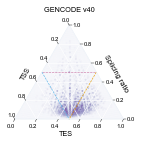

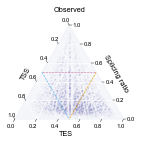

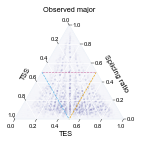

<Figure size 144x1440 with 0 Axes>

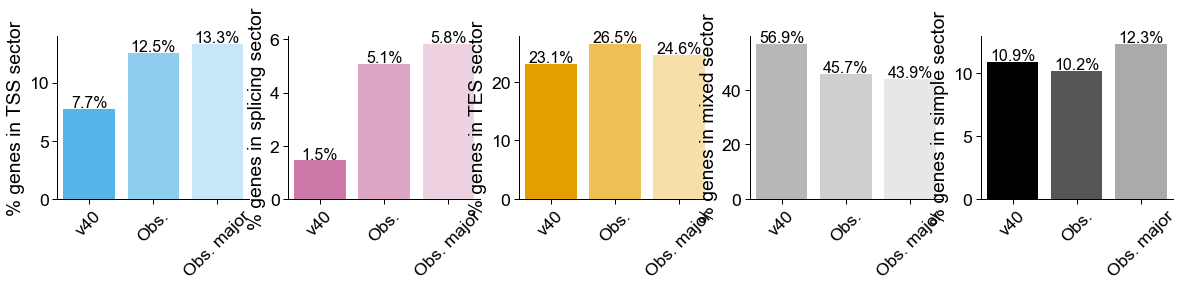

<Figure size 144x1440 with 0 Axes>

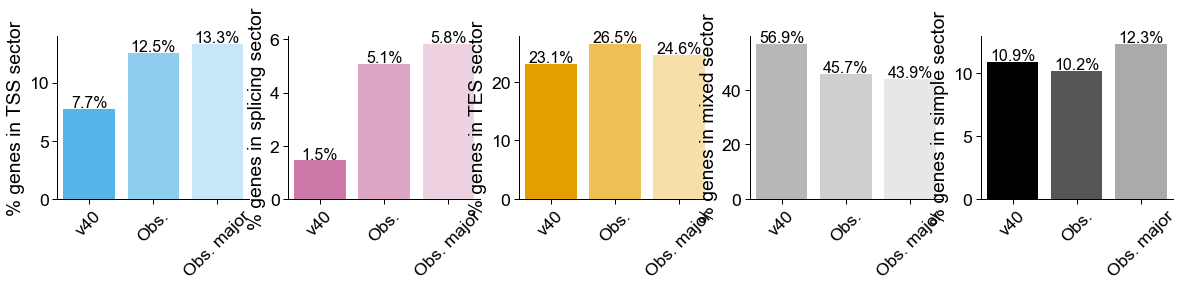

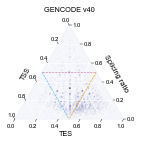

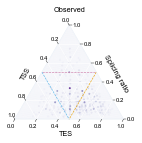

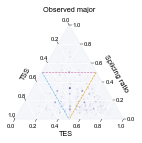

<Figure size 144x1440 with 0 Axes>

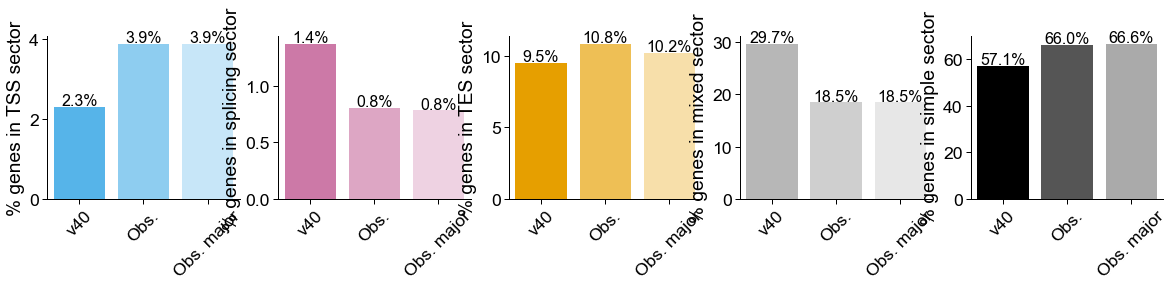

<Figure size 144x1440 with 0 Axes>

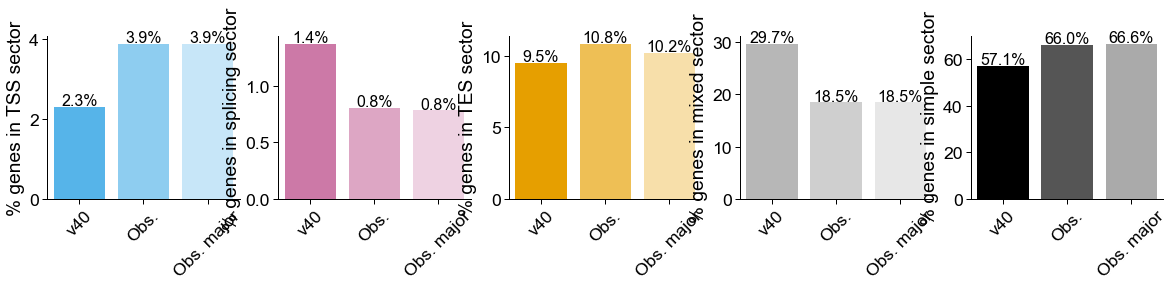

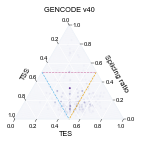

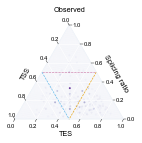

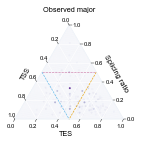

<Figure size 144x1440 with 0 Axes>

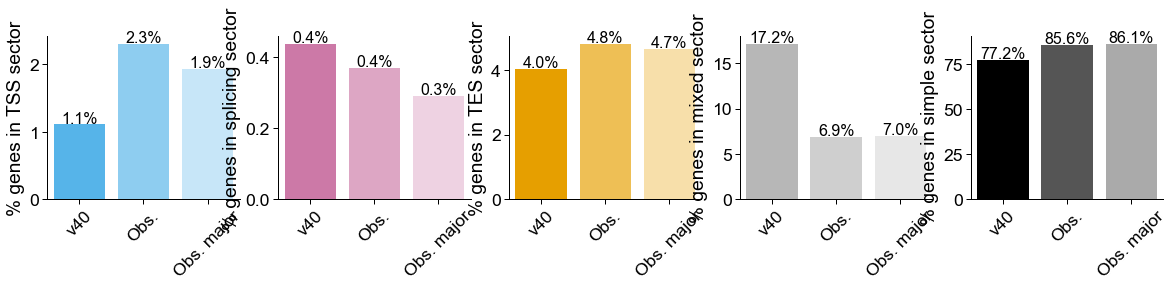

<Figure size 144x1440 with 0 Axes>

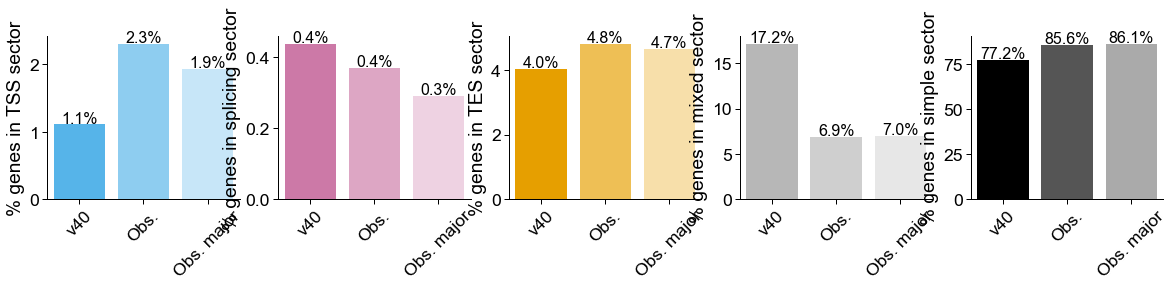

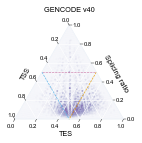

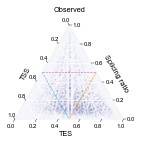

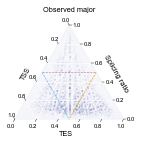

<Figure size 144x1440 with 0 Axes>

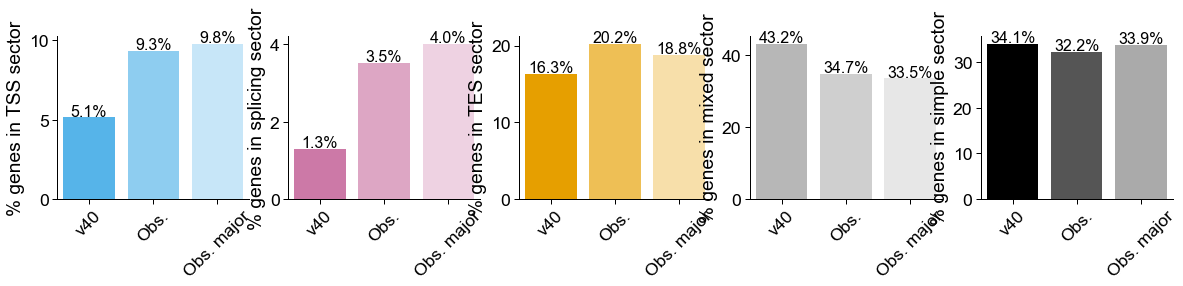

<Figure size 144x1440 with 0 Axes>

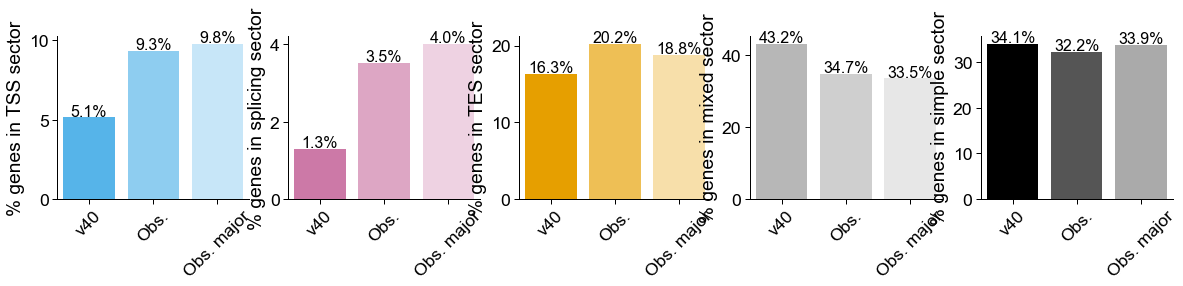

In [27]:
for gs in gene_subsets:
    gs_label = gs
    if gs == 'polya': 
        gs = get_polya_cats()
    
    plot_df = pd.DataFrame()
    for source, title in zip(triplet_sources, titles):
        
        # subset dict
        subset = {'source': source, 'biotype_category': gs}
        print(subset)
        
        # if we're looking at gencode, only take detected genes
        if source == 'v40':
            df = pd.read_csv(ab, sep='\t')
            df, inds = get_tpm_table(df,
                                     how='gene',
                                     gene_subset=gs_label,
                                     min_tpm=min_tpm)
            subset['gid'] = inds
        
        fname = 'figures/simplex_{}_{}.pdf'.format(source, gs_label)
        temp = ca.plot_simplex(top='splicing_ratio',
            subset=subset,
            density=True,
            density_scale=100,
            density_cmap='Purples',
            log_density=True,
            sectors=True,
            scatter=False,
            legend=False,
            title=title,
            size_scale=0.2,
            density_cbar=False,
            fname=fname)
    
        # add sectors from this subset to plot_df
        temp = assign_gisx_sector(temp)
        plot_df = pd.concat([temp, plot_df])
    
    # create the bar plots
    fname = 'figures/{}_genes_per_sector.pdf'.format(gs_label)
    make_sector_source_bar_plots(plot_df, fname)
    
    # create the bar plots
    fname = '{}/{}_genes_per_sector.pdf'.format(fig_dir, gs_label)
    make_sector_source_bar_plots(plot_df, fname)
    
    
    

In [13]:
temp.head()

,source,gid,n_tss,n_tes,n_ic,n_iso,splicing_ratio,gname,sample,gene_tpm,biotype_category,total,tss_ratio,tes_ratio,top_ratio,spl_ratio,sector
846216,obs_major,ENSG00000000003,1.0,5.0,5.0,12.0,1.666667,TSPAN6,NaN,NaN,protein_coding,7.666667,0.130435,0.652174,21.739130,0.217391,tes
846217,obs_major,ENSG00000000005,1.0,1.0,1.0,1.0,1.000000,TNMD,NaN,NaN,protein_coding,3.000000,0.333333,0.333333,33.333333,0.333333,simple
846218,obs_major,ENSG00000000419,2.0,3.0,8.0,10.0,3.200000,DPM1,NaN,NaN,protein_coding,8.200000,0.243902,0.365854,39.024390,0.390244,mixed
846219,obs_major,ENSG00000000457,1.0,3.0,3.0,5.0,1.500000,SCYL3,NaN,NaN,protein_coding,5.500000,0.181818,0.545455,27.272727,0.272727,tes
846220,obs_major,ENSG00000000460,2.0,4.0,6.0,10.0,2.000000,C1orf112,NaN,NaN,protein_coding,8.000000,0.250000,0.500000,25.000000,0.250000,mixed


In [16]:
temp = ca.triplets.loc[ca.triplets.source == 'obs_det']
temp = temp.loc[temp.biotype_category == 'protein_coding']

In [18]:
temp['total'] = temp.n_tss+temp.n_tes+temp.splicing_ratio
temp['tss_ratio'] = temp.n_tss/temp.total
temp['tes_ratio'] = temp.n_tes/temp.total
temp['top_ratio'] = temp.splicing_ratio/temp.total

In [19]:
temp.head()

,source,gid,n_tss,n_tes,n_ic,n_iso,splicing_ratio,gname,sample,gene_tpm,biotype_category,total,tss_ratio,tes_ratio,top_ratio
199758,obs_det,ENSG00000000003,1.0,6.0,9.0,28.0,2.571429,TSPAN6,NaN,NaN,protein_coding,9.571429,0.104478,0.626866,0.268657
199759,obs_det,ENSG00000000005,1.0,1.0,1.0,1.0,1.000000,TNMD,NaN,NaN,protein_coding,3.000000,0.333333,0.333333,0.333333
199760,obs_det,ENSG00000000419,2.0,4.0,9.0,15.0,3.000000,DPM1,NaN,NaN,protein_coding,9.000000,0.222222,0.444444,0.333333
199761,obs_det,ENSG00000000457,3.0,4.0,5.0,7.0,1.428571,SCYL3,NaN,NaN,protein_coding,8.428571,0.355932,0.474576,0.169492
199762,obs_det,ENSG00000000460,3.0,4.0,7.0,15.0,2.000000,C1orf112,NaN,NaN,protein_coding,9.000000,0.333333,0.444444,0.222222


In [20]:
temp[['tss_ratio', 'top_ratio', 'tes_ratio']].mean()

tss_ratio    0.345866
top_ratio    0.251198
tes_ratio    0.402936
dtype: float64

In [22]:
pt1 = [0.34, 0.28, 0.38]
pt2 = [0.345866, 0.251198, 0.402936]
scipy.spatial.distance.jensenshannon(pt1, pt2)

0.023898788456415826

## Individual samples

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import sys
import os
import gseapy as gp
import pdb
import copy
from scipy import sparse
import anndata
import cerberus
import scipy

p = os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd())))
sys.path.append(p)

from scripts.utils import *
from scripts.plotting import *

h5 = '../cerberus_annot.h5'
h5_annot = 'cerberus_annot_triplets.h5'
ab = '../../talon/human_talon_abundance.tsv'
filt_ab = '../cerberus_filtered_abundance.tsv'
obs_col = 'sample'
min_tpm = 1
major_set = '../swan/isos_sample_gene_90.tsv'
mm_tissues = ['adrenal gland', 'heart',
              'muscle', 'brain', 'pgp1_excite_neuron',
              'pgp1_astro', 'h9_osteocyte',
              'h1', 'wtc11']

In [2]:
ca = cerberus.read(h5_annot)

In [3]:
c_dict, order = get_biosample_colors()
c_dict[np.nan] = 'k'

mm_tissues = ['adrenal gland', 'heart',
              'muscle', 'brain', 'pgp1_excite_neuron',
              'pgp1_astro', 'h9_osteocyte']
mmap = {'v40': '*', 'v29': 'x', 'obs_det': '^', 'cerberus': '2'}
subset = {'source': ['sample_det'], 'biotype_category': 'protein_coding'}

# add biotype to subset on 
gene_df, _, _ = get_gtf_info(how='gene', ver='v40_cerberus', add_stable_gid=True)
gene_df = gene_df[['gid_stable', 'biotype_category']]
gene_df.rename({'gid_stable': 'gid'}, axis=1, inplace=True)
ca.triplets = ca.triplets.merge(gene_df, how='left', on='gid')

In [4]:
subset

{'source': ['sample_det'], 'biotype_category': 'protein_coding'}

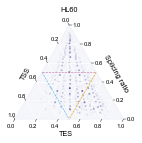

In [5]:
subset['sample'] = 'hl60'
temp = ca.plot_simplex(top='splicing_ratio',
            subset=subset,
            density=True,
            density_scale=100,
            density_cmap='Purples',
            log_density=True,
            sectors=True,
            scatter=False,
            legend=False,
            title='HL60',
            size_scale=1,
            density_cbar=False,
            fname='figures/simplex_density_hl60.pdf')

## TFs

In [4]:
ca = cerberus.read(h5_annot)

In [5]:
ca.triplets.head()

,source,gid,n_tss,n_tes,n_ic,n_iso,splicing_ratio,gname,sample,gene_tpm
0,lapa,ENSG00000000003,2.0,6.0,10.0,30.0,2.5,TSPAN6,NaN,NaN
1,lapa,ENSG00000000005,2.0,2.0,2.0,2.0,1.0,TNMD,NaN,NaN
2,lapa,ENSG00000000419,2.0,4.0,9.0,16.0,3.0,DPM1,NaN,NaN
3,lapa,ENSG00000000457,3.0,5.0,6.0,8.0,1.5,SCYL3,NaN,NaN
4,lapa,ENSG00000000460,3.0,4.0,7.0,15.0,2.0,C1orf112,NaN,NaN


In [9]:
# add biotype category
gene_df, _, _ = get_gtf_info(how='gene', ver='v40_cerberus')
gene_df['gid'] = cerberus.get_stable_gid(gene_df, 'gid')
gene_df = gene_df[['gid', 'tf']]
ca.triplets = ca.triplets.merge(gene_df, how='left', on='gid')

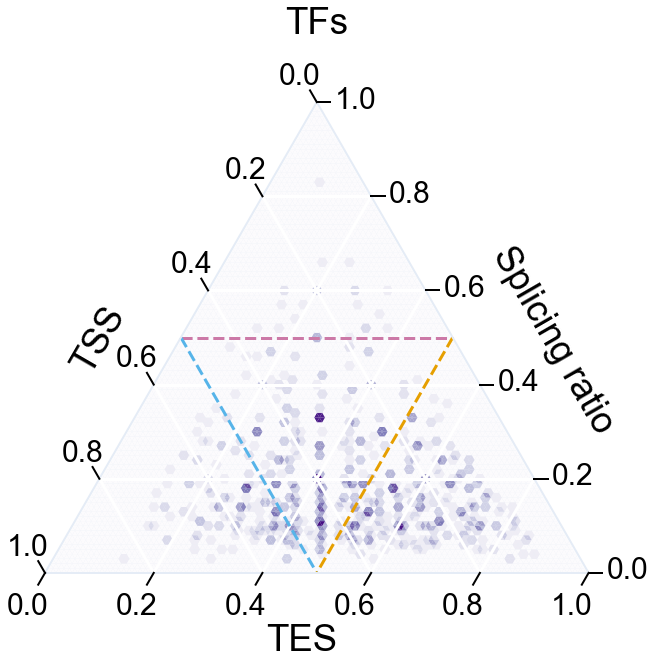

In [11]:
# subset to obs_det and tfs
subset = {'source': ['obs_det'], 'tf': [True]}
temp = ca.plot_simplex(top='splicing_ratio',
            subset=subset,
            density=True,
            density_scale=100,
            density_cmap='Purples',
            log_density=True,
            sectors=True,
            scatter=False,
            legend=False,
            title='TFs',
            size_scale=1,
            density_cbar=False,
            fname='figures/simplex_density_tfs.pdf')